Employee Dataset for Clustering

>دیتاست بالا یک مجموعه داده شامل اطلاعات مربوط به کارمندان است که برای خوشه‌بندی  مناسب است. این دیتاست شامل اطلاعات مختلفی از جمله:
> .سن ،گروه خونی و میزان حقوق دریافتی است


> :این دیتاست می‌تواند برای اهداف مختلفی از جمله موارد زیر استفاده شود


> شناسایی گروه‌های مختلف کارمندان: با استفاده از تکنیک‌های خوشه‌بندی می‌توان کارمندان را بر اساس ویژگی‌های مشترکشان در گروه‌های مختلف قرار داد. این کار می‌تواند برای درک بهتر نیازها و خواسته‌های هر گروه و همچنین برای برنامه‌ریزی‌های منابع انسانی مفید باشد.

پیش‌بینی رفتار کارمندان: با استفاده از مدل‌های یادگیری ماشین می‌توان از دیتاست  برای پیش‌بینی رفتار کارمندان، مانند احتمال ترک شغل یا ارتقای شغلی، استفاده کرد.

بهبود رضایت شغلی: با شناسایی گروه‌های مختلف کارمندان و درک نیازها و خواسته‌های هر گروه، می‌توان برنامه‌های مختلفی برای بهبود رضایت شغلی آنها اجرا کرد.





> Kaggle: https://www.kaggle.com/datasets/syedmuhammadammar/employee-dataset-for-clustering


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Employee DataSet 500 instances.csv to Employee DataSet 500 instances.csv


In [ ]:
!pip install scikit-learn-extra

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans,DBSCAN,MeanShift
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
import matplotlib.pyplot as plt

In [ ]:
datasetcluster = pd.read_csv('Employee DataSet 500 instances.csv')
dcluster = pd.DataFrame(datasetcluster)
dcluster

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,A,36,5,5,2297
1,1,1,A,55,3,5,1134
2,2,2,A,61,8,1,4969
3,3,3,O,29,3,6,902
4,4,4,O,34,6,2,3574
...,...,...,...,...,...,...,...
494,494,494,AB,61,7,4,3691
495,495,495,B,33,7,7,2996
496,496,496,A,47,4,2,2411
497,497,497,A,50,4,7,1252


In [ ]:
dcluster.drop('Unnamed: 0',axis=1,inplace=True)
dcluster

,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,A,36,5,5,2297
1,1,A,55,3,5,1134
2,2,A,61,8,1,4969
3,3,O,29,3,6,902
4,4,O,34,6,2,3574
...,...,...,...,...,...,...
494,494,AB,61,7,4,3691
495,495,B,33,7,7,2996
496,496,A,47,4,2,2411
497,497,A,50,4,7,1252


In [ ]:
dcluster.drop('id',axis=1,inplace=True)
dcluster

,groups,age,healthy_eating,active_lifestyle,salary
0,A,36,5,5,2297
1,A,55,3,5,1134
2,A,61,8,1,4969
3,O,29,3,6,902
4,O,34,6,2,3574
...,...,...,...,...,...
494,AB,61,7,4,3691
495,B,33,7,7,2996
496,A,47,4,2,2411
497,A,50,4,7,1252


In [ ]:
dcluster['groups'] = dcluster['groups'].map({'A':0, 'B':1, 'AB':2, 'O':3})
dcluster

,groups,age,healthy_eating,active_lifestyle,salary
0,0,36,5,5,2297
1,0,55,3,5,1134
2,0,61,8,1,4969
3,3,29,3,6,902
4,3,34,6,2,3574
...,...,...,...,...,...
494,2,61,7,4,3691
495,1,33,7,7,2996
496,0,47,4,2,2411
497,0,50,4,7,1252


In [ ]:
def min_max_normalize(dcluster):
  min_d = np.min(dcluster,axis =0)
  max_d = np.max(dcluster,axis =0)
  normal = (dcluster-min_d)/(max_d-min_d)
  return normal

In [ ]:
dcluster = min_max_normalize(dcluster)
dcluster

,groups,age,healthy_eating,active_lifestyle,salary
0,0.000000,0.391304,0.5,0.5,0.357231
1,0.000000,0.804348,0.3,0.5,0.119009
2,0.000000,0.934783,0.8,0.1,0.904547
3,1.000000,0.239130,0.3,0.6,0.071487
4,1.000000,0.347826,0.6,0.2,0.618804
...,...,...,...,...,...
494,0.666667,0.934783,0.7,0.4,0.642769
495,0.333333,0.326087,0.7,0.7,0.500410
496,0.000000,0.630435,0.4,0.2,0.380582
497,0.000000,0.695652,0.4,0.7,0.143179


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


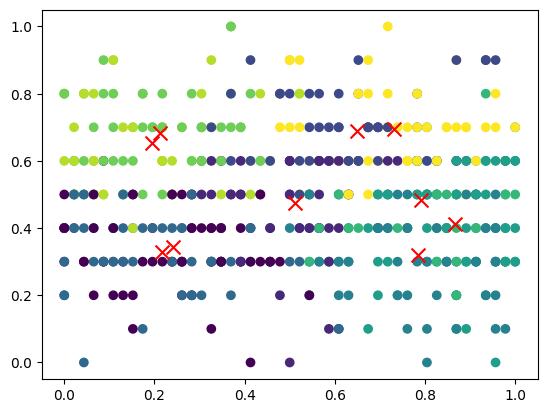

In [ ]:
#Kmeans
kmn = KMeans(n_clusters=10)
kmn.fit(dcluster)
labelskm = kmn.predict(dcluster)
centerkm = kmn.cluster_centers_

plt.scatter(dcluster.iloc[:,1],dcluster.iloc[:,2],c=labelskm)
plt.scatter(centerkm[:,1],centerkm[:,2],c='r',marker = 'x',s=100)
plt.show()

In [ ]:
kmn.inertia_

102.6731350685603

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

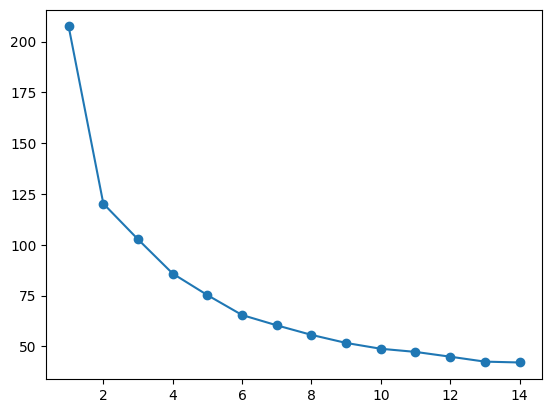

In [ ]:
y1 = []
for i in range(1,15):
  kmn1=KMeans(n_clusters=i)
  kmn1.fit(dcluster)
  y1.append(kmn1.inertia_)

plt.plot(np.arange(1,15),y1,'o-')
plt.show()

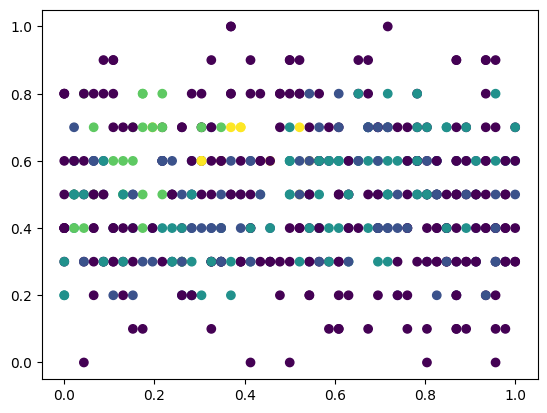

In [ ]:
# DBscan
DBS = DBSCAN(eps=0.2,min_samples=10)
DBS.fit(dcluster)
labelsbd = DBS.labels_


plt.scatter(dcluster.iloc[:,1],dcluster.iloc[:,2],c=labelsbd)
plt.show()

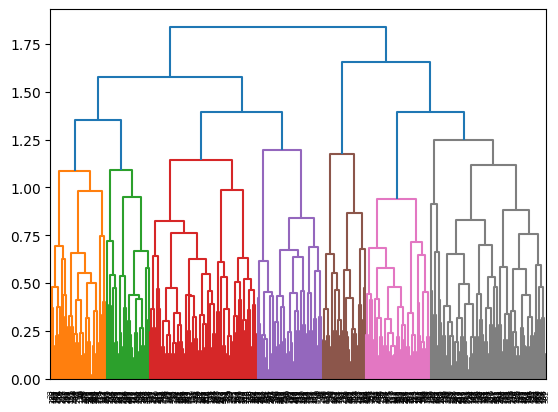

array([4, 3, 1, 6, 5, 7, 7, 1, 1, 3, 1, 5, 7, 7, 7, 3, 4, 3, 3, 5, 7, 6,
       7, 1, 3, 3, 1, 6, 7, 5, 7, 1, 3, 4, 3, 7, 7, 6, 3, 3, 1, 4, 3, 7,
       7, 7, 6, 3, 1, 1, 4, 6, 5, 6, 7, 1, 3, 1, 2, 5, 7, 7, 2, 4, 1, 1,
       4, 7, 6, 5, 7, 4, 4, 3, 2, 5, 7, 5, 7, 3, 4, 4, 3, 5, 6, 7, 7, 2,
       3, 3, 3, 6, 5, 5, 3, 4, 2, 2, 1, 6, 7, 7, 3, 3, 3, 1, 1, 7, 6, 7,
       3, 1, 1, 4, 1, 7, 6, 6, 6, 1, 4, 2, 4, 6, 7, 7, 7, 1, 4, 1, 2, 7,
       7, 7, 2, 4, 4, 3, 3, 6, 7, 5, 2, 7, 4, 2, 1, 7, 7, 7, 7, 3, 1, 1,
       3, 6, 6, 7, 3, 2, 4, 3, 2, 5, 7, 5, 7, 3, 1, 3, 4, 7, 6, 5, 6, 3,
       2, 3, 3, 7, 6, 5, 7, 3, 2, 2, 2, 6, 5, 6, 3, 1, 3, 4, 4, 7, 6, 5,
       3, 4, 4, 1, 4, 5, 7, 6, 2, 1, 2, 1, 4, 5, 5, 7, 6, 1, 3, 3, 4, 7,
       7, 7, 6, 2, 1, 3, 4, 6, 7, 7, 7, 1, 4, 3, 3, 6, 7, 7, 3, 1, 3, 4,
       4, 6, 7, 7, 7, 4, 4, 3, 4, 5, 6, 6, 6, 2, 3, 4, 1, 7, 7, 7, 7, 3,
       4, 2, 1, 7, 7, 5, 5, 3, 2, 2, 2, 7, 7, 7, 7, 3, 1, 3, 1, 5, 6, 7,
       7, 4, 2, 4, 1, 6, 7, 5, 1, 3, 3, 4, 3, 7, 6,

In [ ]:
# سلسه مراتبی حالت اول
hirarical1 = linkage(dcluster,method='complete')
dendrogram(hirarical1)
plt.show()

labels1 = fcluster(hirarical1,1.25,criterion='distance')
labels1

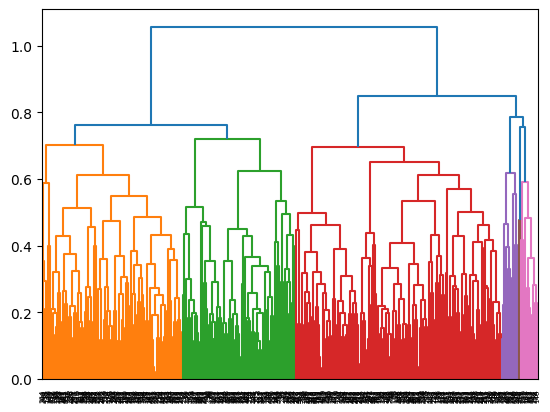

array([ 7, 10, 14,  5,  4,  2,  3,  9,  9,  7,  9,  4,  5,  3,  2, 10,  7,
       10, 10,  4,  2,  5,  2,  9,  9,  9, 14,  5,  3,  4,  3,  9, 10,  7,
        7,  1,  2,  5,  3, 10,  9,  8,  9,  3,  3,  3,  6, 10,  9,  9,  7,
        3,  4,  5,  3,  9,  9, 14, 12,  4,  3,  1,  6,  6, 14,  9,  7,  4,
        5,  4,  1,  6, 11,  9,  7,  4,  2,  4,  3,  9,  7, 11,  9,  2,  5,
        2,  2,  9,  9, 10, 10,  5,  4,  4,  3,  6, 12,  7,  9,  5,  3,  3,
        3, 10,  9, 14,  9,  3,  5,  3,  3,  9,  9, 10,  9,  3,  5,  5,  6,
        9,  7,  7, 11,  5,  3,  3,  3,  9,  7,  9,  7,  3,  1,  3,  6,  6,
        7, 10, 10,  3,  5,  4,  2,  1,  7,  7, 14,  4,  3,  3,  2, 10, 14,
        9,  9,  3,  5,  2,  3,  9,  7, 10,  7,  4,  3,  4,  3, 10, 14,  9,
        8,  3,  5,  2,  6, 10,  7,  7, 10,  3,  5,  4,  2, 10,  7, 14,  7,
        5,  2,  5,  3,  9, 10,  7,  7,  3,  5,  2,  3,  8,  7,  9,  7,  4,
        3,  5, 11, 14, 12,  9,  7,  4,  4,  3,  6, 14,  7, 10, 10,  3,  2,
        2,  6,  9,  9, 10

In [ ]:
# سلسه مراتبی حالت دوم
hirarical2 = linkage(dcluster,method='average')
dendrogram(hirarical2)
plt.show()

labels2 = fcluster(hirarical2,0.6,criterion='distance')
labels2

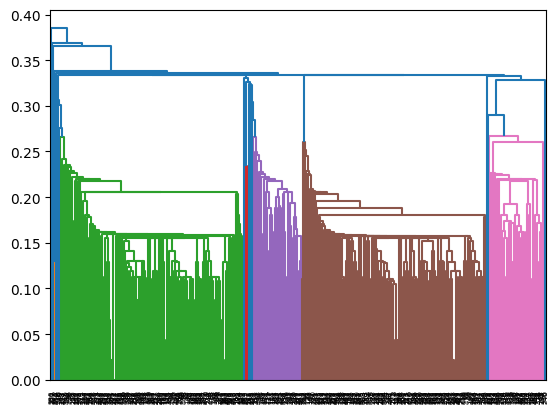

array([ 3,  3, 25, 16, 16, 16, 18,  9,  3,  3,  3, 16, 16, 16, 18,  9,  3,
        3,  3, 16, 16, 16, 18,  9,  3,  3,  3, 16, 16, 16, 18,  9,  3,  3,
        3, 16, 16, 16, 18,  9,  3,  3,  3, 16, 16, 16, 18,  9,  3,  3,  3,
       16, 16, 16, 18,  9,  3,  3,  3, 16, 16, 16, 18,  9,  3,  3,  3, 16,
       16, 16, 22,  9,  3,  3,  3, 16, 16, 16, 18,  9,  3,  3,  3, 16, 16,
       16, 18,  9,  3,  3,  2, 16, 16, 16, 18,  9,  3,  3,  3, 16, 16, 16,
       18,  9,  3,  3,  3, 16, 16, 16, 18,  9,  3,  3,  3, 16, 16, 16, 18,
        9,  3,  3,  3, 16, 16, 16, 18,  9,  3,  3,  3, 16, 16, 16, 18, 11,
        3,  3,  3, 16, 16, 16, 18, 13,  3,  3,  3, 16, 16, 16, 18,  9,  3,
        3,  3, 16, 16, 16, 18,  9,  3,  3,  3, 16, 16, 16, 18,  9,  3,  3,
        3, 16, 16, 16, 18,  9,  3,  3,  3, 16, 16, 16, 18,  9,  3,  3,  3,
       16, 16, 16, 18,  9,  3,  3,  3, 16, 16, 16, 18,  9,  3,  3,  3, 15,
       16, 16, 24,  1,  3,  3,  3, 16, 17, 16, 18, 12,  3,  3,  4, 16, 16,
       16, 18,  9,  3,  3

In [ ]:
# سلسه مراتبی حالت سوم
hirarical3 = linkage(dcluster,method='single')
dendrogram(hirarical3)
plt.show()

labels3 = fcluster(hirarical3,0.25,criterion='distance')
labels3

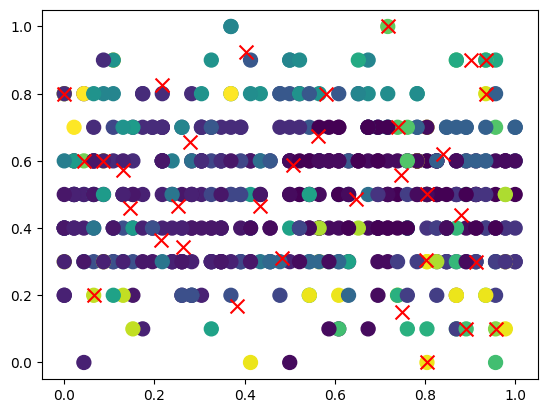

In [ ]:
# meanshift
meanshipt = MeanShift(bandwidth=0.3)
meanshipt.fit(dcluster)
labelms = meanshipt.labels_
centerms = meanshipt.cluster_centers_

plt.scatter(dcluster.iloc[:,1],dcluster.iloc[:,2], marker='o', s=100, c=labelms)
plt.scatter(centerms[:,1], centerms[:,2], marker='x', s=100, c='r')
plt.show()

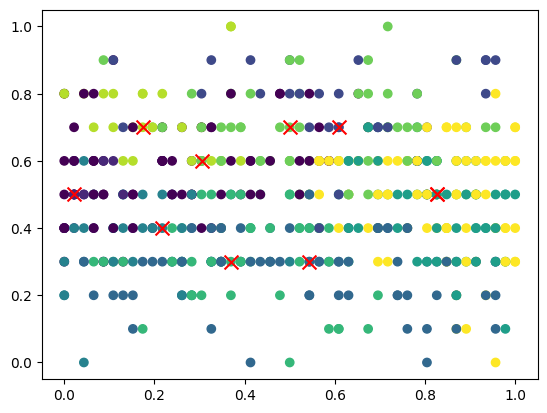

In [ ]:
#KMedoids
kmed = KMedoids(n_clusters=10)
kmed.fit(dcluster)
labelsmed = kmed.predict(dcluster)
centermed = kmed.cluster_centers_

plt.scatter(dcluster.iloc[:,1],dcluster.iloc[:,2],c=labelsmed)
plt.scatter(centermed[:,1],centermed[:,2],c='r',marker = 'x',s=100)
plt.show()

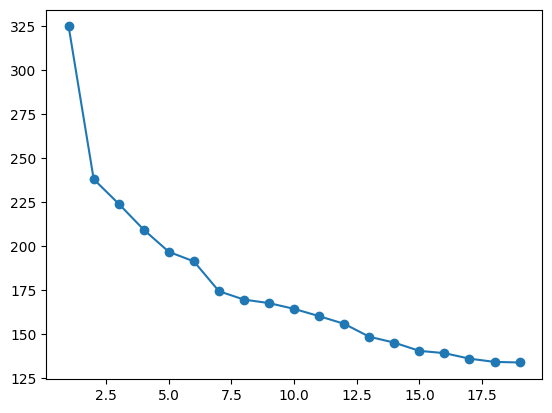

In [ ]:
y2 = []
for i in range(1,20):
  kmed=KMedoids(n_clusters=i)
  kmed.fit(dcluster)
  y2.append(kmed.inertia_)

plt.plot(np.arange(1,20),y2,'o-')
plt.show()

Heart Disease

> این پایگاه داده حاوی ۷۶ ویژگی است، اما تمامی آزمایش‌های منتشر شده به استفاده از زیرمجموعه‌ای از ۱۴ ویژگی اشاره می‌کنند. به‌طور خاص، پایگاه داده کلیولند تنها پایگاهی است که تا به امروز توسط پژوهشگران یادگیری ماشین استفاده شده است. فیلد "هدف" به وجود بیماری قلبی در بیمار اشاره دارد و مقادیر آن از ۰ (عدم وجود) تا ۴ (شدت بالا) متغیر است. آزمایش‌های انجام شده با پایگاه داده کلیولند روی تمایز ساده بین وجود بیماری (مقادیر ۱، ۲، ۳، ۴) و عدم وجود آن (مقدار ۰) تمرکز کرده‌اند.
به تازگی نام‌ها و کدهای ملی بیماران از پایگاه داده حذف شده و با مقادیر نمایشی جایگزین شده‌اند.



> https://archive.ics.uci.edu/dataset/45/heart+disease





In [ ]:
!pip install ucimlrepo

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from  sklearn import  tree
from  sklearn.tree import  DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from  sklearn.metrics import accuracy_score
from  sklearn.metrics import precision_score
from  sklearn.metrics import recall_score
from  sklearn.metrics import f1_score
from  sklearn.metrics import ConfusionMatrixDisplay
from  sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import normalize

In [ ]:
from ucimlrepo import fetch_ucirepo

heart_disease = fetch_ucirepo(id=45)

dataX = heart_disease.data.features
datay = heart_disease.data.targets

In [ ]:
dataz = pd.concat([dataX,datay],axis = 1)
dataz

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [ ]:
dataz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
dataz.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
dataz.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataz=dataz.dropna(axis=0)
dataz

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


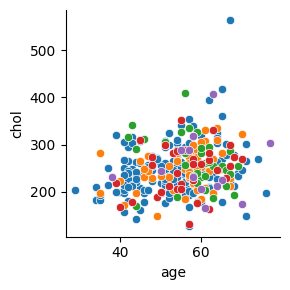

In [ ]:
fg = sns.FacetGrid(dataz,hue='num')
fg.map(sns.scatterplot,'age','chol')

In [ ]:
classifx=dataz.drop('num',axis=1)
classify =dataz['num']

In [ ]:
#مدل اول نرمال سازی
classifyx1 = scale(classifx)
classifyx1 = pd.DataFrame(classifyx1,index=classifx.index,columns=classifx.columns)
classifyx1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.936181,0.691095,-2.240629,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,2.264145,-0.721976,0.655877
1,1.378929,0.691095,0.873880,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,0.643781,2.478425,-0.894220
2,1.378929,0.691095,0.873880,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,0.643781,1.411625,1.172577
3,-1.941680,0.691095,-0.164289,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,2.264145,-0.721976,-0.894220
4,-1.498933,-1.446980,-1.202459,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.976583,-0.721976,-0.894220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.272059,-1.446980,0.873880,0.468418,-0.122330,-0.411450,-1.003419,-1.161395,1.435916,-0.734914,0.643781,-0.721976,1.172577
298,-1.056185,0.691095,-2.240629,-1.223355,0.320744,-0.411450,-1.003419,-0.768432,-0.696419,0.124076,0.643781,-0.721976,1.172577
299,1.489615,0.691095,0.873880,0.693988,-1.047008,2.430427,-1.003419,-0.375469,-0.696419,2.013854,0.643781,1.411625,1.172577
300,0.272059,0.691095,0.873880,-0.095506,-2.241384,-0.411450,-1.003419,-1.510696,1.435916,0.124076,0.643781,0.344824,1.172577


In [ ]:
#مدل دوم نرمال سازی
classifyx2 = min_max_normalize(classifx)
classifyx2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.583333,0.0,1.000000,0.433962,0.262557,0.0,0.0,0.396947,1.0,0.032258,0.5,0.000000,1.00
298,0.333333,1.0,0.000000,0.150943,0.315068,0.0,0.0,0.465649,0.0,0.193548,0.5,0.000000,1.00
299,0.812500,1.0,1.000000,0.471698,0.152968,1.0,0.0,0.534351,0.0,0.548387,0.5,0.666667,1.00
300,0.583333,1.0,1.000000,0.339623,0.011416,0.0,0.0,0.335878,1.0,0.193548,0.5,0.333333,1.00


In [ ]:
classify

0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: num, Length: 297, dtype: int64

In [ ]:
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(classifyx1,classify,test_size=0.3)
x_train2 , x_test2 , y_train2 , y_test2 = train_test_split(classifyx2,classify,test_size=0.3)

In [ ]:
mlp1 = MLPClassifier(hidden_layer_sizes=100,max_iter=300,alpha=1e-4,activation='relu',solver='adam')
mlp2 = MLPClassifier(hidden_layer_sizes=100,max_iter=300,alpha=1e-4,activation='relu',solver='adam')

In [ ]:
mlp1.fit(x_train1,y_train1)
mlp2.fit(x_train2,y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=100, max_iter=300)

In [ ]:
y_pred1 = mlp1.predict(x_test1)
y_pred2 = mlp2.predict(x_test2)

In [ ]:
confusion_matrix(y_test1,y_pred1)

array([[44,  9,  0,  0,  0],
       [ 7,  4,  0,  2,  0],
       [ 2,  2,  5,  2,  1],
       [ 0,  1,  4,  2,  1],
       [ 0,  1,  0,  2,  1]])

In [ ]:
confusion_matrix(y_test2,y_pred2)

array([[39,  6,  1,  1,  0],
       [ 6,  4,  3,  1,  0],
       [ 2,  4,  1,  5,  0],
       [ 2,  6,  4,  2,  0],
       [ 0,  2,  0,  1,  0]])

In [ ]:
mlp1.score(x_train1,y_train1)

0.8357487922705314

In [ ]:
mlp2.score(x_train2,y_train2)

0.7198067632850241

In [ ]:
mlp1.score(x_test1,y_test1)

0.6222222222222222

In [ ]:
mlp2.score(x_test2,y_test2)

0.5111111111111111

In [ ]:
score1 = cross_val_score(mlp1,classifyx1,classify,cv=5)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
score1.mean()

0.5688135593220338

In [ ]:
score2 = cross_val_score(mlp2,classifyx2,classify,cv=5)

In [ ]:
score2.mean()

0.5822033898305085

In [ ]:
#svm
listsvm={'kernel':['linear','poly','rbf'],
   'gamma':['scale','auto'],
   'degree':[1,2,3,4,5]
}

In [ ]:
svmmodel1 =SVC()
svmmodel2 =SVC()

In [ ]:
gsvm = GridSearchCV(svmmodel1,listsvm,n_jobs=-1,cv=5)
gsvm.fit(classifyx1,classify)
print(gsvm.best_params_)

{'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
gsvm = GridSearchCV(svmmodel2,listsvm,n_jobs=-1,cv=5)
gsvm.fit(classifyx2,classify)
print(gsvm.best_params_)

{'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
# clf =SVC(kernel='linear')
svmmodel1 =SVC(kernel='poly',degree=1,gamma='scale')
svmmodel2 =SVC(kernel='poly',degree=1,gamma='scale')
# clf =SVC(kernel='rbf')

svmmodel1.fit(x_train1,y_train1)
svmmodel2.fit(x_train2,y_train2)

SVC(degree=1, kernel='poly')

In [ ]:
y_pred1 = svmmodel1.predict(x_test1)
y_pred2 = svmmodel2.predict(x_test2)

In [ ]:
confusion_matrix(y_test1,y_pred1)

array([[41,  1,  1,  0,  0],
       [16,  0,  1,  3,  0],
       [ 4,  0,  5,  0,  0],
       [ 3,  5,  5,  0,  0],
       [ 0,  0,  2,  3,  0]])

In [ ]:
confusion_matrix(y_test2,y_pred2)

array([[50,  1,  0,  0,  0],
       [ 8,  3,  4,  3,  0],
       [ 1,  0,  1,  5,  0],
       [ 1,  2,  4,  3,  0],
       [ 1,  2,  0,  1,  0]])

In [ ]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.64      0.95      0.77        43
           1       0.00      0.00      0.00        20
           2       0.36      0.56      0.43         9
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         5

    accuracy                           0.51        90
   macro avg       0.20      0.30      0.24        90
weighted avg       0.34      0.51      0.41        90



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89        51
           1       0.38      0.17      0.23        18
           2       0.11      0.14      0.12         7
           3       0.25      0.30      0.27        10
           4       0.00      0.00      0.00         4

    accuracy                           0.63        90
   macro avg       0.31      0.32      0.30        90
weighted avg       0.58      0.63      0.59        90



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#KNN
# p=2 فاصله اقلیدوسی
knn1  = KNeighborsClassifier(n_neighbors= 28 , metric='minkowski',p=2)
knn2  = KNeighborsClassifier(n_neighbors= 40 , metric='minkowski',p=2)

In [ ]:
knn1.fit(x_train1,y_train1)
knn2.fit(x_train2,y_train2)

KNeighborsClassifier(n_neighbors=40)

In [ ]:
knn1.score(x_test1,y_test1)

0.6222222222222222

In [ ]:
knn2.score(x_test2,y_test2)

0.6111111111111112

In [ ]:
neibeors1 = np.arange(1,35)
train_acc1 = np.empty(len(neibeors1))
test_acc1 = np.empty(len(neibeors1))

for i,k in enumerate(neibeors1):
  knn_model1 = KNeighborsClassifier(n_neighbors= k)
  knn_model1.fit(x_train1,y_train1)
  train_acc1[i] = knn_model1.score(x_train1,y_train1)
  test_acc1[i] = knn_model1.score(x_test1,y_test1)

<function matplotlib.pyplot.show(close=None, block=None)>

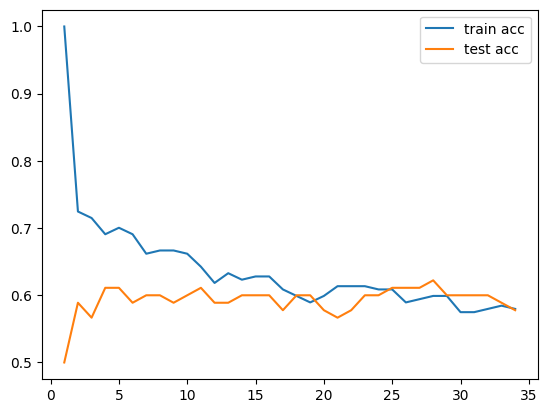

In [ ]:
plt.plot(neibeors1,train_acc1,label='train acc')
plt.plot(neibeors1,test_acc1,label='test acc')
plt.legend()
plt.show

In [ ]:
neibeors2 = np.arange(1,45)
train_acc2 = np.empty(len(neibeors2))
test_acc2 = np.empty(len(neibeors2))

for i,k in enumerate(neibeors2):
  knn_model2 = KNeighborsClassifier(n_neighbors= k)
  knn_model2.fit(x_train2,y_train2)
  train_acc2[i] = knn_model2.score(x_train2,y_train2)
  test_acc2[i] = knn_model2.score(x_test2,y_test2)

<function matplotlib.pyplot.show(close=None, block=None)>

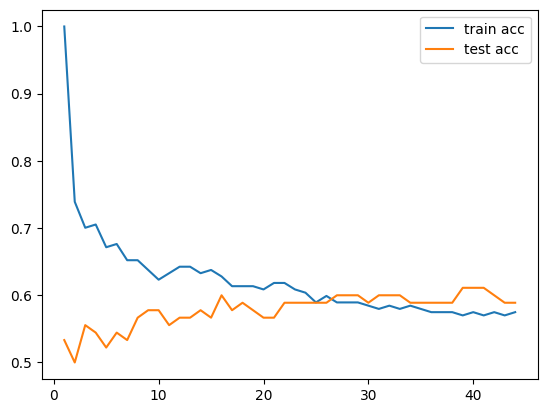

In [ ]:
plt.plot(neibeors2,train_acc2,label='train acc')
plt.plot(neibeors2,test_acc2,label='test acc')
plt.legend()
plt.show

In [ ]:
#bayes
bayesmodel1 = GaussianNB()
bayesmodel2 = GaussianNB()

In [ ]:
y_predbayes1 =bayesmodel1.fit(x_train1,y_train1).predict(x_test1)
y_predbayes2 =bayesmodel2.fit(x_train2,y_train2).predict(x_test2)

In [ ]:
print(classification_report(y_predbayes1,y_test1))

              precision    recall  f1-score   support

           0       0.64      0.97      0.77        35
           1       0.00      0.00      0.00         0
           2       0.08      0.17      0.11         6
           3       0.00      0.00      0.00         0
           4       0.75      0.06      0.11        49

    accuracy                           0.42        90
   macro avg       0.29      0.24      0.20        90
weighted avg       0.66      0.42      0.37        90



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_predbayes2,y_test2))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78        38
           1       0.29      0.20      0.24        20
           2       0.25      0.18      0.21        17
           3       0.29      0.31      0.30        13
           4       0.00      0.00      0.00         2

    accuracy                           0.49        90
   macro avg       0.30      0.31      0.30        90
weighted avg       0.45      0.49      0.46        90



In [ ]:
#RandomForest
rf1 = RandomForestClassifier()
rf2 = RandomForestClassifier()

rf1.fit(x_train1,y_train1)
rf2.fit(x_train2,y_train2)

y_predrf1 =rf1.predict(x_test1)
y_predrf2 =rf2.predict(x_test2)

print(classification_report(y_predrf1,y_test1))
print(classification_report(y_predrf2,y_test2))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83        63
           1       0.08      0.08      0.08        12
           2       0.17      0.25      0.20         8
           3       0.25      0.33      0.29         6
           4       0.00      0.00      0.00         1

    accuracy                           0.59        90
   macro avg       0.28      0.29      0.28        90
weighted avg       0.68      0.59      0.63        90

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        52
           1       0.00      0.00      0.00        11
           2       0.25      0.23      0.24        13
           3       0.14      0.14      0.14        14
           4       0.00      0.00      0.00         0

    accuracy                           0.51        90
   macro avg       0.25      0.23      0.24        90
weighted avg       0.56      0.51      0.54        90



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Decision tree
DT1 = DecisionTreeClassifier()
DT2 = DecisionTreeClassifier()

DT1.fit(x_train1, y_train1)
DT2.fit(x_train2, y_train2)

DecisionTreeClassifier()

In [ ]:
y_predDT1 = DT1.predict(x_test1)
y_predDT2 = DT2.predict(x_test2)

In [ ]:
confusion_matrix(y_test1, y_predDT1)

array([[41,  5,  3,  4,  0],
       [ 6,  1,  3,  2,  1],
       [ 2,  3,  2,  4,  1],
       [ 1,  0,  3,  2,  2],
       [ 0,  1,  1,  2,  0]])

In [ ]:
confusion_matrix(y_test2, y_predDT2)

array([[29, 11,  3,  3,  1],
       [ 3,  3,  3,  4,  1],
       [ 2,  2,  4,  3,  1],
       [ 1,  6,  5,  1,  1],
       [ 1,  1,  0,  1,  0]])

In [ ]:
print(classification_report(y_test1, y_predDT1))
print(classification_report(y_test2, y_predDT2))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        53
           1       0.11      0.08      0.09        13
           2       0.22      0.17      0.19        12
           3       0.17      0.25      0.20         8
           4       0.29      0.50      0.36         4

    accuracy                           0.54        90
   macro avg       0.32      0.36      0.33        90
weighted avg       0.54      0.54      0.54        90

              precision    recall  f1-score   support

           0       0.81      0.62      0.70        47
           1       0.13      0.21      0.16        14
           2       0.27      0.33      0.30        12
           3       0.08      0.07      0.08        14
           4       0.00      0.00      0.00         3

    accuracy                           0.41        90
   macro avg       0.26      0.25      0.25        90
weighted avg       0.49      0.41      0.44        90



Advertising dataset



> این مجموعه داده، میزان فروش را با توجه به نوع تبلیغات و بزرگی هزینه آن ها نشان می دهد. این مجموعه داده شامل 200 ردیف و 3 ویژگی است: [تلویزیون، رادیو، روزنامه] و یک متغیر هدف به نام [فروش].



> https://www.kaggle.com/datasets/tawfikelmetwally/advertising-dataset





In [ ]:
#regression
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
datasetreg = pd.read_csv('Advertising.csv')
datasetreg

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
datasetreg.drop('Unnamed: 0',axis=1,inplace=True)
datasetreg

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
datasetreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
datasetreg.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [ ]:
datasetreg = min_max_normalize(datasetreg)
datasetreg

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.303150
3,0.509976,0.832661,0.511873,0.665354
4,0.609063,0.217742,0.510994,0.444882
...,...,...,...,...
195,0.126818,0.074597,0.118734,0.236220
196,0.316199,0.098790,0.068602,0.318898
197,0.596212,0.187500,0.053650,0.440945
198,0.956713,0.846774,0.579595,0.940945


In [ ]:
datasetregx=datasetreg.drop('Sales',axis=1)
datasetregy =datasetreg['Sales']

In [ ]:
datasetregx

,TV,Radio,Newspaper
0,0.775786,0.762097,0.605981
1,0.148123,0.792339,0.394019
2,0.055800,0.925403,0.606860
3,0.509976,0.832661,0.511873
4,0.609063,0.217742,0.510994
...,...,...,...
195,0.126818,0.074597,0.118734
196,0.316199,0.098790,0.068602
197,0.596212,0.187500,0.053650
198,0.956713,0.846774,0.579595


In [ ]:
datasetregy

0      0.807087
1      0.346457
2      0.303150
3      0.665354
4      0.444882
         ...   
195    0.236220
196    0.318898
197    0.440945
198    0.940945
199    0.464567
Name: Sales, Length: 200, dtype: float64

In [ ]:
x_trainr,x_testr,y_trainr,y_testr = train_test_split(datasetregx,datasetregy,test_size=0.3)

In [ ]:
x_trainrlin=x_trainr.iloc[:,0:1]
x_testrlin=x_testr.iloc[:,0:1]

In [ ]:
modelreg = LinearRegression()
modelreg.fit(x_trainrlin,y_trainr)

LinearRegression()

In [ ]:
y_predreg = modelreg.predict(x_testrlin)

In [30]:
mse = mean_squared_error(y_testr,y_predreg)
r2 = r2_score(y_testr,y_predreg)
print('mse=',mse)
print('r2=',r2)

mse= 0.016171805733751116
r2= 0.4575181783090633


In [32]:
modelreg.coef_

array([0.5666377])

In [33]:
modelreg.intercept_

0.20814611513720088

In [34]:
modelregmul = LinearRegression()
modelregmul.fit(x_trainr,y_trainr)

LinearRegression()

In [35]:
y_predregmul = modelregmul.predict(x_testr)

In [36]:
mse = mean_squared_error(y_testr,y_predregmul)
r2 = r2_score(y_testr,y_predregmul)
print('mse=',mse)
print('r2=',r2)

mse= 0.0034893872097615923
r2= 0.882948808481794


In [39]:
modelregmul.coef_

array([0.53395347, 0.35588966, 0.01032026])

In [38]:
modelregmul.intercept_

0.054757787438209804

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(datasetregx)
x_trainrm,x_testrm,y_trainrm,y_testrm = train_test_split(x_poly,datasetregy,test_size=0.3)

modelregmul.fit(x_trainrm,y_trainrm)
y_predrm = modelregmul.predict(x_testrm)
mse = mean_squared_error(y_testrm,y_predrm)
r2 = r2_score(y_testrm,y_predrm)
print('mse=',mse)
print('r2=',r2)

mse= 0.0007140447475340872
r2= 0.983312848388232
